In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train =  pd.read_csv("../input/santander-customer-transaction-prediction/train.csv")
test = pd.read_csv("../input/santander-customer-transaction-prediction/test.csv")

train.head()
#test.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train_copy = train.copy()
test_copy =  test.copy()

In [6]:
train_data = train.iloc[:,2:]
train_lables = train.iloc[:,:2]

#X_train.head()
train_lables.head()

,ID_code,target
0,train_0,0
1,train_1,0
2,train_2,0
3,train_3,0
4,train_4,0


In [7]:
train_data.shape , train_lables.shape

((200000, 200), (200000, 2))

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 200 entries, var_0 to var_199
dtypes: float64(200)
memory usage: 305.2 MB


# EDA

In [9]:
train_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [10]:
# Let us make a dataframe of null values per columns
def na_check(df):
    na_val = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    na_df = pd.concat([na_val,percent], axis = 1 , keys = ['NullCount','Percent'])
    return na_df

null_df = na_check(train_data)
null_df

,NullCount,Percent
var_0,0,0.0
var_1,0,0.0
var_2,0,0.0
var_3,0,0.0
var_4,0,0.0
...,...,...
var_195,0,0.0
var_196,0,0.0
var_197,0,0.0
var_198,0,0.0


In [11]:
#Seems like there are not any Missing Values in the training dataset, to cross verify, let us check for the whole dataframe
train_data.isnull().sum().sum(), test.isnull().sum().sum(), train_lables.isnull().sum().sum()


(0, 0, 0)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


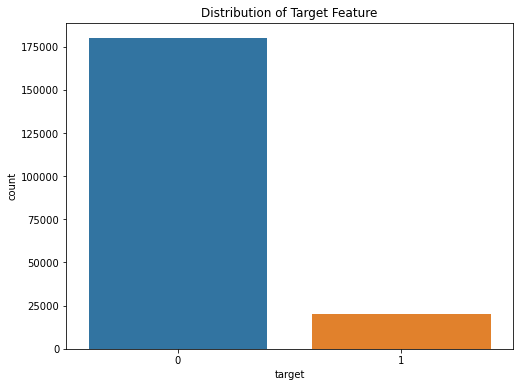

In [12]:
# Distrbution of Target feature
plt.figure(figsize=(8,6))
plt.title("Distribution of Target Feature")
sns.countplot(train_lables['target'])
plt.show()



#From above graph we can see that data is not balanced. 

In [13]:

print('Count of 0_targets:',((train_lables['target']==0).sum()), 
      '\nCount of 1_targets:' , ((train_lables['target']==1).sum()),
     '\nPercent of 1_targets:' , ((train_lables['target']==1).sum()/train_lables.shape[0]*100))

Count of 0_targets: 179902 
Count of 1_targets: 20098 
Percent of 1_targets: 10.049


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


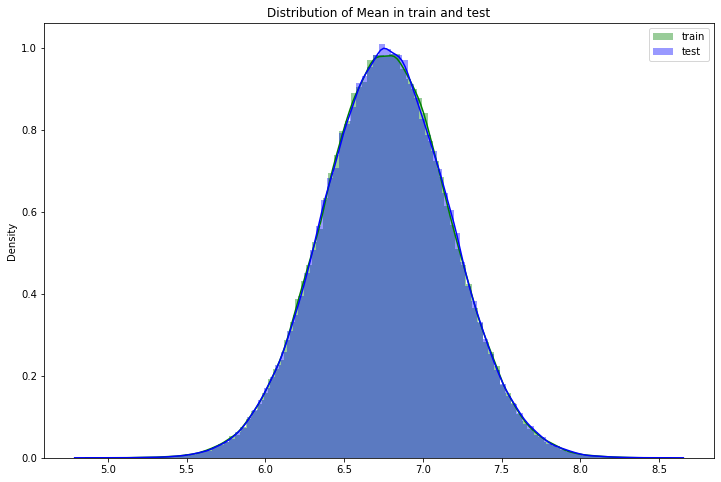

In [14]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Mean in train and test')
sns.distplot(train_data.mean(axis=1),color='green', bins=100, label='train')
sns.distplot(test.mean(axis=1),color='blue', bins = 100, label = 'test')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


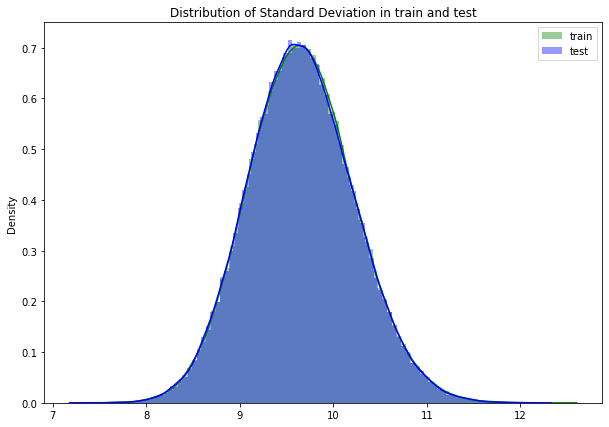

In [15]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Standard Deviation in train and test')
sns.distplot(train_data.std(axis=1),color='green', bins=100, label='train')
sns.distplot(test.std(axis=1),color='blue', bins = 100, label = 'test')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


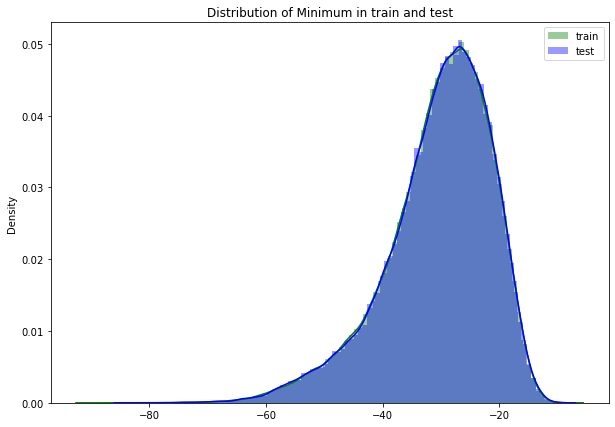

In [16]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Minimum in train and test')
sns.distplot(train_data.min(axis=1),color='green', bins=100, label='train')
sns.distplot(test.min(axis=1),color='blue', bins = 100, label = 'test')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


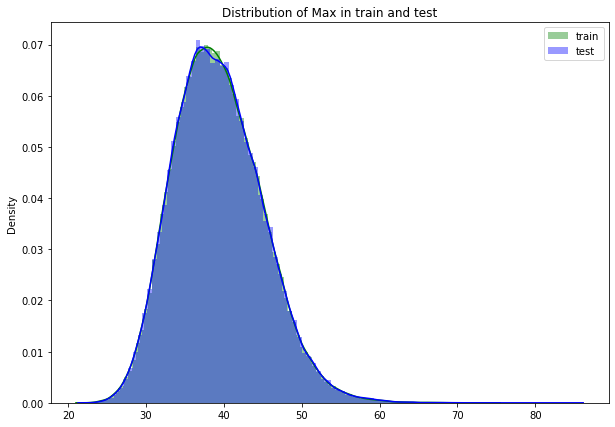

In [17]:
plt.figure(figsize=(10,7))
plt.title('Distribution of Max in train and test')
sns.distplot(train_data.max(axis=1),color='green', bins=100, label='train')
sns.distplot(test.max(axis=1),color='blue', bins = 100, label = 'test')
plt.legend()

In [18]:
type(train_data.columns)

pandas.core.indexes.base.Index

**Finding Correlations**

In [19]:
train_corr = train.corr()
train_corr.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506


<AxesSubplot:>

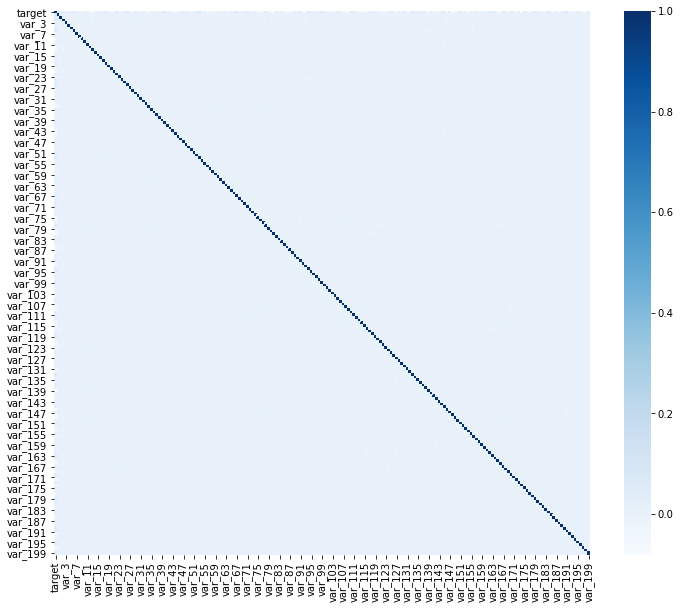

In [20]:
#Plotting Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train_corr, cmap='Blues')
#plt.show()

Here from heatmap we can see that there are no significant corrleation coefficients. 

In [21]:
#One more way to calculate Pearson Correlation Coeff is by personr function from SciPy library. 
#The function returns corr coeff and Pvalue roughly indicates the probability of an uncorrelated 
#system producing datasets that have a Pearson correlation at least as extreme as the one 
#computed from these datasets. (_ means we do not want to assign returned pvalue)

"""from scipy.stats import pearsonr
train_data_corr12, _ =  pearsonr(train_data['var_1'] , train_data['var_2'])

print('Pearson Corr :' , train_data_corr12 )"""

"from scipy.stats import pearsonr\ntrain_data_corr12, _ =  pearsonr(train_data['var_1'] , train_data['var_2'])\n\nprint('Pearson Corr :' , train_data_corr12 )"

# Outlier Analysis

In [22]:
def out_IQR(df):
    drop_outliers = np.array([])
    for i in df.columns:
        q1, q3 = np.percentile(df[i],[25,75])
        IQR = q3-q1
        lower_limit = q1-(1.5*IQR)
        upper_limit = q3+(1.5*IQR)
        print(type(lower_limit), type(upper_limit),type(df[i]))
        indexes = df[(df[i] < lower_limit) | (df[i] > upper_limit)].index
        
        drop_outliers = np.append(drop_outliers , indexes)
    return drop_outliers
        

In [23]:
outliers = np.unique(out_IQR(train.iloc[:,2:]))
outliers.shape

<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.S

<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.Series'>
<class 'numpy.float64'> <class 'numpy.float64'> <class 'pandas.core.series.S

(24896,)

In [24]:
train.drop(outliers, inplace = True)

In [25]:
train.shape

(175104, 202)

# Performing PCA

**Standardizing the dataset**

In [26]:
from sklearn.preprocessing import StandardScaler

**Standardizing the train data**

In [27]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train.iloc[:,2:])
scaled_train_data.shape, type(scaled_train_data)

((175104, 200), numpy.ndarray)

In [28]:
from sklearn.decomposition import PCA

In [29]:
#Calculating PCA with 2 Principal Components. 
pca = PCA(n_components = 2)
pca.fit(scaled_train_data)
pca_train_data = pca.transform(scaled_train_data)
pca_train_data.shape


(175104, 2)

In [30]:
train_lables = train.iloc[:,[1]]
train_data = train.iloc[:,2:]
train_lables.value_counts()

target
0         157999
1          17105
dtype: int64

In [31]:
train_lables.shape

(175104, 1)

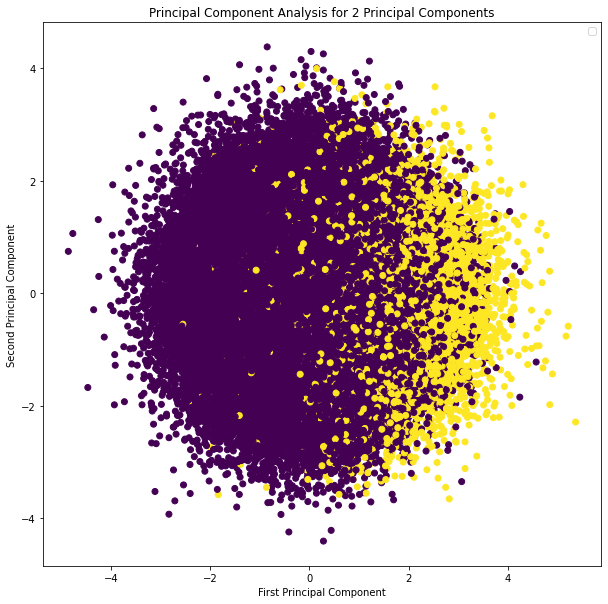

In [32]:
#Visualizing the PCA with 2 prinipal components and with target variable
plt.figure(figsize = (10,10))
plt.scatter(pca_train_data[:,0], pca_train_data[:,1], c = train_lables['target'])
plt.title('Principal Component Analysis for 2 Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

From above graph we observe that the target values are overlapping, implying they are not separable with 2 components of PCA. Let us also check the total variance explained by these 2 PCs.

In [33]:
print((pca.explained_variance_).sum())

2.182419250055969


Function to map total variance explained by PCs and n_components for step of 25

In [34]:
def total_var_exp(scaled_df):
    exp_var = []
    n_components = []
    from sklearn.decomposition import PCA
    for i in range(1,len(scaled_df[1])+1,25):
        pca = PCA(n_components = i)
        pca.fit(scaled_df)
        exp_var.append((pca.explained_variance_).sum()*0.1)
        n_components.append(i)
        #pca_df = pca.transform()
    
    plt.figure(figsize = (10,10))
    sns.lineplot(n_components, exp_var)
    plt.xlabel('No of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend()
    plt.show()
    
    

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


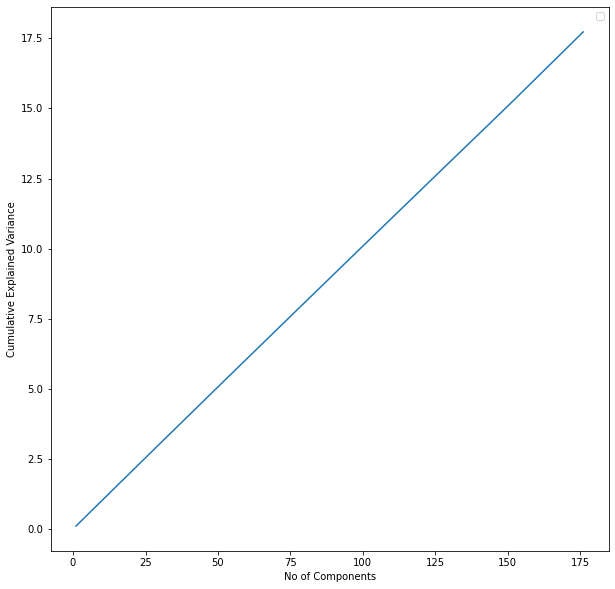

In [35]:
total_var_exp(scaled_train_data)

We can see that PCs are not explaining the variance of the dataset. As number of PCs increase explained variance is also increasing, and it is maxing at around 200. Meaning all the varianbles needed to consider, and we can not perform PCA.


# Feature Engineering

Since we do not have any information about the variables, we can not derive any new feature from business knowledge. So we will approach by simple statistical methods of addition, maximum, minimum, mean, etc. 

In [36]:

#def stat_feat_add(df):
cols= train_data.columns.values
for df in [train_data,test]:
    df['sum'] = df.sum(axis=1)
    df['mean'] = df.mean(axis=1)
    df['median'] = df.median(axis=1)
    df['std'] = df.std(axis=1)
    df['max'] = df.max(axis=1)
    df['min'] = df.min(axis=1)
    

In [37]:
train_data.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_196,var_197,var_198,var_199,sum,mean,median,std,max,min
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,7.8784,8.5635,12.7803,-1.0914,1456.3182,14.490728,7.02725,102.122152,1456.3182,-21.4494
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,-6.5213,8.2675,14.7222,0.3965,1240.8966,12.347230,6.04820,87.091833,1240.8966,-22.4038
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,-2.9275,10.2922,17.9697,-8.9996,1288.2319,12.818228,6.89760,90.465394,1288.2319,-35.1659
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,3.9267,9.5031,17.9974,-8.8104,1354.2310,13.474935,6.99625,95.233147,1354.2310,-65.4863
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-3.6241,9.7670,12.5809,-4.7602,1272.3216,12.659916,6.42715,89.331390,1272.3216,-44.7257


Now scaling train_data

In [38]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_train_data

array([[-0.57868908, -1.27199359,  0.45409308, ...,  1.27841701,
         1.28274395,  0.99270622],
       [-0.68298118, -0.27404239,  0.51951464, ..., -1.42192397,
        -1.40379186,  0.88717034],
       [ 0.12546404, -0.1273604 , -0.66759835, ..., -0.81583132,
        -0.81347047, -0.52404042],
       ...,
       [ 0.26649916,  0.28168944, -0.92943639, ..., -0.05684572,
        -0.05459895,  0.75418893],
       [ 0.1791603 , -0.84360514, -0.07542694, ...,  0.27045109,
         0.26785154, -2.10915759],
       [ 0.06470944, -1.00629149,  0.53385881, ...,  0.07012702,
         0.07683605,  0.49024969]])

In [39]:
scaled_train_data.shape

(175104, 206)

In [40]:
#Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_train_data , train_lables , test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape
#y_train.shape, y_test.shape

((140083, 206), (35021, 206))

In [41]:
type((y_train.values).ravel())

numpy.ndarray

# Modeling

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc


Logistics Regression Without Class Balance

In [43]:
# Training the Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Predicting on training and test data
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr =  lr.predict(X_test)

#Calculating and printing f1 score for train and test
f1_train_lr = f1_score(y_train,y_train_pred_lr)
f1_test_lr = f1_score(y_test,y_test_pred_lr)
print('The f1 score for the training data:', f1_train_lr)
print('The f1 score for the testing data:', f1_test_lr)

# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_lr = lr.predict_proba(X_train)[:,1]
y_test_pred_prob_lr = lr.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_lr_auc = roc_auc_score(y_train, y_train_pred_prob_lr)
y_test_pred_lr_auc = roc_auc_score(y_test, y_test_pred_prob_lr)
print('The AUC for train data: %.3f'% (y_train_pred_lr_auc))
print('The AUC for test data: %.3f'% (y_test_pred_lr_auc))




/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The f1 score for the training data: 0.3799294645719782
The f1 score for the testing data: 0.3749479816895547
The AUC for train data: 0.861
The AUC for test data: 0.863


In [44]:
#Calculating the ROC Curve
train_fpr_lr, train_tpr_lr, train_threshold_lr = roc_curve(y_train,y_train_pred_prob_lr)
test_fpr_lr, test_tpr_lr, test_threshold_lr = roc_curve(y_test,y_test_pred_prob_lr)

In [45]:
train_threshold_lr, test_threshold_lr

(array([1.99656996e+00, 9.96569957e-01, 9.69354273e-01, ...,
        7.56172533e-04, 7.56103029e-04, 7.62840047e-05]),
 array([1.99381725e+00, 9.93817247e-01, 9.56490468e-01, ...,
        1.09952226e-03, 1.09847175e-03, 1.98575048e-05]))

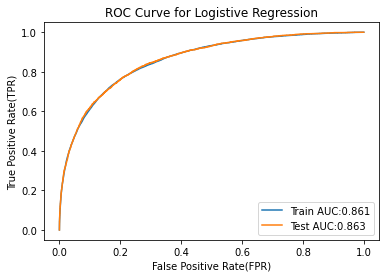

In [46]:
#Plotting the ROC Curve
plt.plot(train_fpr_lr,train_tpr_lr, label='Train AUC:%.3f'% (y_train_pred_lr_auc))
plt.plot(test_fpr_lr,test_tpr_lr, label='Test AUC:%.3f'% (y_test_pred_lr_auc))

plt.title("ROC Curve for Logistive Regression")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()

In [47]:
#Classification Reports for Train and Test
from sklearn.metrics import classification_report
print('Classification Report of Train:\n',classification_report(y_train,y_train_pred_lr))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred_lr))

Classification Report of Train:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    126519
           1       0.69      0.26      0.38     13564

    accuracy                           0.92    140083
   macro avg       0.81      0.62      0.67    140083
weighted avg       0.90      0.92      0.90    140083

Classification Report of Test:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     31480
           1       0.71      0.25      0.37      3541

    accuracy                           0.91     35021
   macro avg       0.82      0.62      0.66     35021
weighted avg       0.90      0.91      0.90     35021



In [48]:
#Confusion Matrices for Train and Test
cm_train_lr = confusion_matrix(y_train,y_train_pred_lr)
cm_train_df_lr = pd.DataFrame(cm_train_lr)

cm_test_lr = confusion_matrix(y_test,y_test_pred_lr)
cm_test_df_lr = pd.DataFrame(cm_test_lr)

print('Confusion Matrix for Train')
print(cm_train_df_lr)
print('Confusion Matrix for Test')
print(cm_test_df_lr)


Confusion Matrix for Train
        0     1
0  124924  1595
1   10009  3555
Confusion Matrix for Test
       0    1
0  31116  364
1   2640  901


Text(0.5, 1.0, 'Confustion Matrix of train')

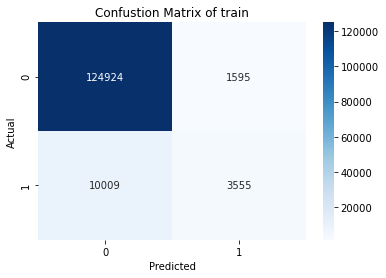

In [49]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_df_lr, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

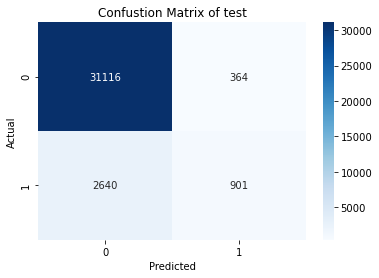

In [50]:
#Plotting Heatmap for Test Confusion Matrix
sns.heatmap(cm_test_df_lr, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')

# Logistic Regression with Class Balance

In [51]:
# Training the Model
lr_cb = LogisticRegression(class_weight='balanced')
lr_cb.fit(X_train, y_train)

#Predicting on training and test data
y_train_pred_lr_cb = lr_cb.predict(X_train)
y_test_pred_lr_cb =  lr_cb.predict(X_test)

#Calculating and printing f1 score for train and test
f1_train_lr_cb = f1_score(y_train,y_train_pred_lr_cb)
f1_test_lr_cb = f1_score(y_test,y_test_pred_lr_cb)
print('The f1 score for the training data:', f1_train_lr_cb)
print('The f1 score for the testing data:', f1_test_lr_cb)

# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_lr_cb = lr_cb.predict_proba(X_train)[:,1]
y_test_pred_prob_lr_cb = lr_cb.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_lr_cb_auc = roc_auc_score(y_train, y_train_pred_prob_lr_cb)
y_test_pred_lr_cb_auc = roc_auc_score(y_test, y_test_pred_prob_lr_cb)
print('The AUC for train data: %.3f'% (y_train_pred_lr_cb_auc))
print('The AUC for test data: %.3f'% (y_test_pred_lr_cb_auc))



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The f1 score for the training data: 0.4104532588887596
The f1 score for the testing data: 0.41926388783052654
The AUC for train data: 0.863
The AUC for test data: 0.863


In [52]:
#Calculating the ROC Curve
train_fpr_lr_cb, train_tpr_lr_cb, train_threshold_lr_cb = roc_curve(y_train,y_train_pred_prob_lr_cb)
test_fpr_lr_cb, test_tpr_lr_cb, test_threshold_lr_cb = roc_curve(y_test,y_test_pred_prob_lr_cb)

In [53]:
train_threshold_lr_cb, test_threshold_lr_cb

(array([1.99949292e+00, 9.99492923e-01, 9.96135617e-01, ...,
        7.66662812e-03, 7.66591278e-03, 8.62213856e-04]),
 array([1.99930667e+00, 9.99306675e-01, 9.94243275e-01, ...,
        1.07431185e-02, 1.07223653e-02, 2.11594565e-04]))

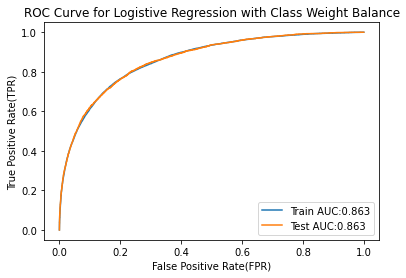

In [54]:
#Plotting the ROC Curve
plt.plot(train_fpr_lr_cb,train_tpr_lr_cb, label='Train AUC:%.3f'% (y_train_pred_lr_cb_auc))
plt.plot(test_fpr_lr_cb,test_tpr_lr_cb, label='Test AUC:%.3f'% (y_test_pred_lr_cb_auc))

plt.title("ROC Curve for Logistive Regression with Class Weight Balance")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()

In [55]:
#Classification Reports for Train and Test
from sklearn.metrics import classification_report
print('Classification Report of Train:\n',classification_report(y_train,y_train_pred_lr_cb))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred_lr_cb))

Classification Report of Train:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87    126519
           1       0.28      0.78      0.41     13564

    accuracy                           0.78    140083
   macro avg       0.62      0.78      0.64    140083
weighted avg       0.90      0.78      0.82    140083

Classification Report of Test:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87     31480
           1       0.29      0.78      0.42      3541

    accuracy                           0.78     35021
   macro avg       0.63      0.78      0.64     35021
weighted avg       0.90      0.78      0.82     35021



In [56]:
#Confusion Matrices for Train and Test
cm_train_lr_cb = confusion_matrix(y_train,y_train_pred_lr_cb)
cm_train_df_lr_cb = pd.DataFrame(cm_train_lr_cb)

cm_test_lr_cb = confusion_matrix(y_test,y_test_pred_lr_cb)
cm_test_df_lr_cb = pd.DataFrame(cm_test_lr_cb)

print('Confusion Matrix for Train')
print(cm_train_df_lr_cb)
print('Confusion Matrix for Test')
print(cm_test_df_lr_cb)

Confusion Matrix for Train
       0      1
0  99087  27432
1   2978  10586
Confusion Matrix for Test
       0     1
0  24649  6831
1    790  2751


Text(0.5, 1.0, 'Confustion Matrix of train')

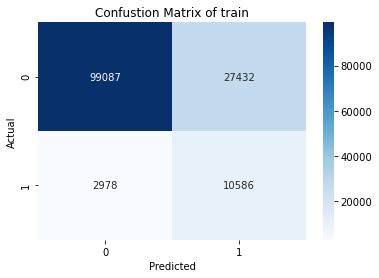

In [57]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_df_lr_cb, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

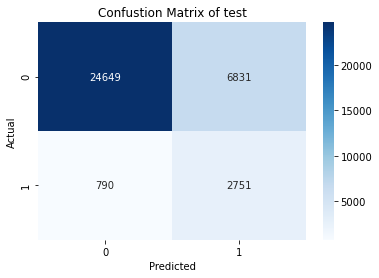

In [58]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_test_df_lr_cb, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')

# Random Forest with RandomizedSearchCV Hyperparameter Tuning

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

#Hyper Parameters for Random Forest

In [60]:
parameter_grid = {'n_estimators':[100,110],'max_depth':[10,15],'min_samples_split':[100,120],'min_samples_leaf':[10,20]}
print(parameter_grid)

{'n_estimators': [100, 110], 'max_depth': [10, 15], 'min_samples_split': [100, 120], 'min_samples_leaf': [10, 20]}


Using RandomizedSearchCV for hyperparamter tuning of Random Forest

In [61]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_clf, param_distributions = parameter_grid,scoring='roc_auc', cv = 3, verbose = 3, n_jobs = -1,random_state=42)

In [62]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 38.6min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'min_samples_leaf': [10, 20],
                                        'min_samples_split': [100, 120],
                                        'n_estimators': [100, 110]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [63]:
#Let us check which are the best parameters predicted by our model
rf_random.best_params_

{'n_estimators': 110,
 'min_samples_split': 100,
 'min_samples_leaf': 10,
 'max_depth': 15}

In [64]:
#Predicting on training and test data
y_train_pred_rf_rsv = rf_random.predict(X_train)
y_test_pred_rf_rsv =  rf_random.predict(X_test)

#Calculating and printing f1 score for train and test
f1_train_rf_rsv = f1_score(y_train,y_train_pred_rf_rsv)
f1_test_rf_rsv = f1_score(y_test,y_test_pred_rf_rsv)
print('The f1 score for the testing data:', f1_train_rf_rsv)
print('The f1 score for the testing data:', f1_test_rf_rsv)


# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_rf_rsv = rf_random.predict_proba(X_train)[:,1]
y_test_pred_prob_rf_rsv = rf_random.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_rf_rsv_auc = roc_auc_score(y_train, y_train_pred_prob_rf_rsv)
y_test_pred_rf_rsv_auc = roc_auc_score(y_test, y_test_pred_prob_rf_rsv)
print('The AUC for train data: %.3f'% (y_train_pred_rf_rsv_auc))
print('The AUC for test data: %.3f'% (y_test_pred_rf_rsv_auc))

The f1 score for the testing data: 0.0
The f1 score for the testing data: 0.0
The AUC for train data: 0.926
The AUC for test data: 0.823


In [65]:
#Calculating the ROC Curve
train_fpr_rf_rsv, train_tpr_rf_rsv, train_threshold_rf_rsv = roc_curve(y_train,y_train_pred_prob_rf_rsv)
test_fpr_rf_rsv, test_tpr_rf_rsv, test_threshold_rf_rsv = roc_curve(y_test,y_test_pred_prob_rf_rsv)

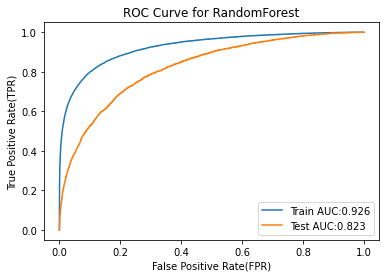

In [66]:
#Plotting the ROC Curve
plt.plot(train_fpr_rf_rsv,train_tpr_rf_rsv, label='Train AUC:%.3f'% (y_train_pred_rf_rsv_auc))
plt.plot(test_fpr_rf_rsv,test_tpr_rf_rsv, label='Test AUC:%.3f'% (y_test_pred_rf_rsv_auc))

plt.title("ROC Curve for RandomForest")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()

In [67]:
from sklearn import metrics
train_recall_rsv = metrics.recall_score(y_train, y_train_pred_rf_rsv)
train_precision_rsv = metrics.precision_score(y_train, y_train_pred_rf_rsv)
print(train_recall_rsv, train_precision_rsv)

0.0 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#Classification Reports for Train and Test
from sklearn.metrics import classification_report
print('Classification Report of Train:\n',classification_report(y_train,y_train_pred_rf_rsv))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred_rf_rsv))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report of Train:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    126519
           1       0.00      0.00      0.00     13564

    accuracy                           0.90    140083
   macro avg       0.45      0.50      0.47    140083
weighted avg       0.82      0.90      0.86    140083

Classification Report of Test:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     31480
           1       0.00      0.00      0.00      3541

    accuracy                           0.90     35021
   macro avg       0.45      0.50      0.47     35021
weighted avg       0.81      0.90      0.85     35021



In [69]:
#Confusion Matrices for Train and Test
cm_train_rf_rsv = confusion_matrix(y_train,y_train_pred_rf_rsv)
cm_train_df_rf_rsv = pd.DataFrame(cm_train_rf_rsv)

cm_test_rf_rsv = confusion_matrix(y_test,y_test_pred_rf_rsv)
cm_test_df_rf_rsv = pd.DataFrame(cm_test_rf_rsv)

print('Confusion Matrix for Train')
print(cm_train_df_rf_rsv)
print('Confusion Matrix for Test')
print(cm_test_df_rf_rsv)

Confusion Matrix for Train
        0  1
0  126519  0
1   13564  0
Confusion Matrix for Test
       0  1
0  31480  0
1   3541  0


Text(0.5, 1.0, 'Confustion Matrix of train')

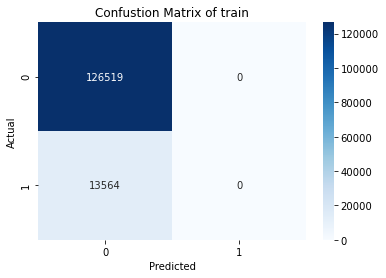

In [70]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_df_rf_rsv, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

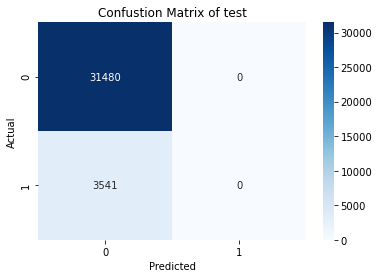

In [71]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_test_df_rf_rsv, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')

# XgBoost with HyperParameter Tuning

In [82]:
#Importing Xgboost
import xgboost as xgb

In [83]:
parameters = {
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [3,6,9],
    'min_child_weight': [1,5],
    'gamma': [0,0.2,0.4],
    'colsample_bytree': [0.3,0.4,0.5]
}

In [84]:
xgb_clf = xgb.XGBClassifier()

In [85]:
xgb_rsv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, n_jobs=-1,random_state=42,cv=3,verbose=3,scoring='roc_auc')

In [86]:
xgb_rsv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 74.5min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[21:11:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [87]:
#Predicting on training and test data
y_train_pred_xgb = xgb_rsv.predict(X_train)
y_test_pred_xgb =  xgb_rsv.predict(X_test)

In [88]:
#Calculating and printing f1 score for train and test
f1_train_xgb = f1_score(y_train,y_train_pred_xgb)
f1_test_xgb = f1_score(y_test,y_test_pred_xgb)
print('The f1 score for the training data:', f1_train_xgb)
print('The f1 score for the testing data:', f1_test_xgb)


# Calculating predicted probabilities(for positive classe) for train and test
y_train_pred_prob_xgb = xgb_rsv.predict_proba(X_train)[:,1]
y_test_pred_prob_xgb = xgb_rsv.predict_proba(X_test)[:,1]

#Calculating AUC score for train and test
y_train_pred_xgb_auc = roc_auc_score(y_train, y_train_pred_prob_xgb)
y_test_pred_xgb_auc = roc_auc_score(y_test, y_test_pred_prob_xgb)
print('The AUC for train data: %.3f'% (y_train_pred_xgb_auc))
print('The AUC for test data: %.3f'% (y_test_pred_xgb_auc))

The f1 score for the training data: 0.6970801192560693
The f1 score for the testing data: 0.36613175675675674
The AUC for train data: 0.974
The AUC for test data: 0.860


In [95]:
#Calculating the ROC Curve
train_fpr_xgb, train_tpr_xgb, train_threshold_xgb = roc_curve(y_train,y_train_pred_prob_xgb)
test_fpr_xgb, test_tpr_xgb, test_threshold_xgb = roc_curve(y_test,y_test_pred_prob_xgb)

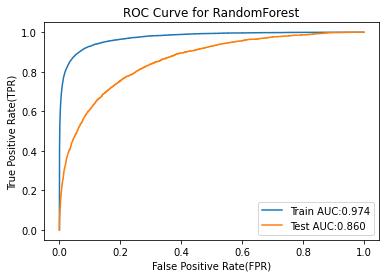

In [96]:
#Plotting the ROC Curve
plt.plot(train_fpr_xgb,train_tpr_xgb, label='Train AUC:%.3f'% (y_train_pred_xgb_auc))
plt.plot(test_fpr_xgb,test_tpr_xgb, label='Test AUC:%.3f'% (y_test_pred_xgb_auc))

plt.title("ROC Curve for RandomForest")
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')

plt.legend()
plt.show()

In [89]:
from sklearn import metrics
train_recall_xgb = metrics.recall_score(y_train, y_train_pred_xgb)
train_precision_xgb = metrics.precision_score(y_train, y_train_pred_xgb)
print('Train Precision:%.3f'% train_precision_xgb)
print('Train Recall:%.3f'% train_recall_xgb)

test_recall_xgb = metrics.recall_score(y_test, y_test_pred_xgb)
train_precision_xgb = metrics.precision_score(y_test, y_test_pred_xgb)
print('Test Precision:%.3f'% train_precision_xgb)
print('Test Recall:%.3f'% test_recall_xgb)

Train Precision:0.973
Train Recall:0.543
Test Precision:0.726
Test Recall:0.245


In [90]:
cm_train_mat_xgb = confusion_matrix(y_train, y_train_pred_xgb)
print(cm_train_mat_xgb)
cm_test_mat_xbg = confusion_matrix(y_test, y_test_pred_xgb)
print(cm_test_mat_xbg)

[[126317    202]
 [  6199   7365]]
[[31152   328]
 [ 2674   867]]


Text(0.5, 1.0, 'Confustion Matrix of train')

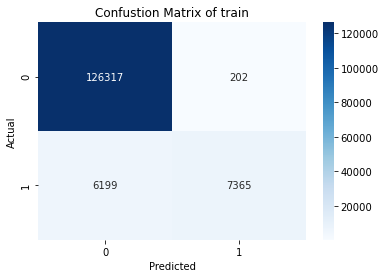

In [91]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_train_mat_xgb, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of train')

Text(0.5, 1.0, 'Confustion Matrix of test')

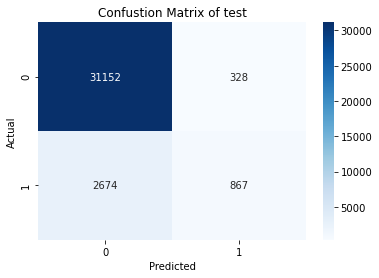

In [92]:
#Plotting Heatmap for Train Confusion Matrix
sns.heatmap(cm_test_mat_xbg, fmt='g', annot = True, cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix of test')